# Loading the data  

In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

# Exploring the Format of the Data

In [4]:
type(train_data)

list

In [5]:
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

# Setting up Vocabulary of All Words

In [12]:
vocab = set()

In [13]:
all_data = test_data + train_data

In [14]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1

In [18]:
max_story_len = max([len(data[0]) for data in all_data])

In [19]:
max_story_len

156

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
max_question_len

6

# Vectorizing the Data

In [22]:
vocab_size = len(vocab) + 1

In [23]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

2024-02-25 22:15:08.967959: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-25 22:15:09.093723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 22:15:09.093759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 22:15:09.122290: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-25 22:15:09.159270: I tensorflow/core/platform/cpu_feature_guar

In [24]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [25]:
tokenizer.word_index

{'moved': 1,
 '?': 2,
 'john': 3,
 'put': 4,
 'got': 5,
 'bathroom': 6,
 'sandra': 7,
 'mary': 8,
 'apple': 9,
 'journeyed': 10,
 'bedroom': 11,
 'no': 12,
 'football': 13,
 'down': 14,
 'hallway': 15,
 'took': 16,
 'there': 17,
 'is': 18,
 'picked': 19,
 'up': 20,
 'travelled': 21,
 'went': 22,
 'milk': 23,
 'garden': 24,
 '.': 25,
 'office': 26,
 'discarded': 27,
 'kitchen': 28,
 'in': 29,
 'daniel': 30,
 'back': 31,
 'dropped': 32,
 'the': 33,
 'grabbed': 34,
 'yes': 35,
 'left': 36,
 'to': 37}

In [26]:
train_story_text = []
train_question_text = []
train_answers = []

for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [27]:
train_story_seg = tokenizer.texts_to_sequences(train_story_text)

In [28]:
len(train_story_text)

10000

In [29]:
len(train_story_seg)

10000

# Functionalize Vectorization

In [30]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))    

In [31]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [32]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [33]:
inputs_test

array([[ 0,  0,  0, ..., 33, 11, 25],
       [ 0,  0,  0, ..., 33, 24, 25],
       [ 0,  0,  0, ..., 33, 24, 25],
       ...,
       [ 0,  0,  0, ..., 33,  9, 25],
       [ 0,  0,  0, ..., 33, 24, 25],
       [ 0,  0,  0, ...,  9, 17, 25]], dtype=int32)

In [34]:
queries_test

array([[18,  3, 29, 33, 28,  2],
       [18,  3, 29, 33, 28,  2],
       [18,  3, 29, 33, 24,  2],
       ...,
       [18,  8, 29, 33, 11,  2],
       [18,  7, 29, 33, 24,  2],
       [18,  8, 29, 33, 24,  2]], dtype=int32)

In [35]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [36]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 497.,   0.,   0.])

In [37]:
tokenizer.word_index['yes']

35

In [38]:
tokenizer.word_index['no']

12

In [308]:
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM, Embedding, Dense
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [40]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

# Encoders

Input Encoder m

In [41]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

2024-02-25 22:15:11.268093: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-25 22:15:11.395569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-25 22:15:11.395757: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Input Encoder c

In [42]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

Question Encoder

In [43]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

Encode the Sequences

In [44]:
input_encoder_m = input_encoder_m(input_sequence)
input_encoder_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [45]:
match = dot([input_encoder_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [46]:
response = add([match, input_encoder_c])
response = Permute((2, 1))(response)

In [47]:
answer = concatenate([response, question_encoded])

In [48]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [49]:
answer = LSTM(32)(answer)

In [50]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [51]:
answer = Activation('softmax')(answer)

model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [53]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=120, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120


2024-02-25 22:15:13.495641: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8800
2024-02-25 22:15:13.555955: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6f75c1dce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-25 22:15:13.555986: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-02-25 22:15:13.571789: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1708874113.638776   14862 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 [==============================] - 3s 5ms/step - loss: 0.9060 - accuracy: 0.4904 - val_loss: 0.7127 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.4955 - val_loss: 0.6942 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 1s 3ms/step - loss: 0.6975 - accuracy: 0.5005 - val_loss: 0.6945 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.4967 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.4906 - val_loss: 0.6952 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 1s 3ms/step - loss: 0.6951 - accuracy: 0.5061 - val_loss: 0.6943 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 1s 4ms/step - loss: 0.6954 - accuracy: 0.4998 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 8/120

Saving the Model

In [54]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

/home/dotronghiep/anaconda3/envs/NLP/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluating the Model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


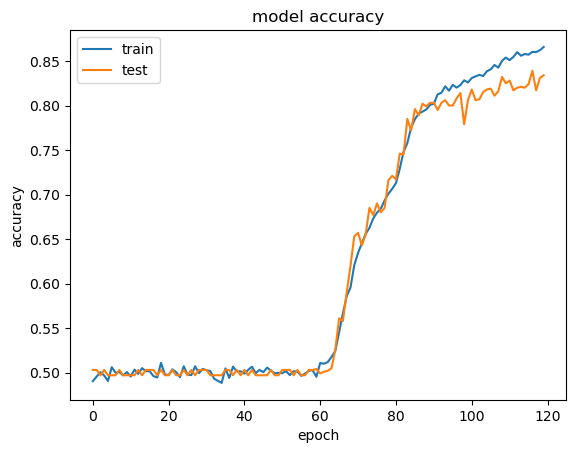

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model.load_weights(filename)

In [57]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 1ms/step


In [58]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [59]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [60]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [61]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [62]:
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9999008


# Improve model

In [309]:
vocab_size 

38

Input encoder m

In [404]:
im_input_encoder_m = Sequential()
im_input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
im_input_encoder_m.add(Dropout(0.3))
im_input_encoder_m.add(Dense(32, activation='relu'))
im_input_encoder_m.add(Dropout(0.3))


Input encoder c

In [405]:
im_input_encoder_c = Sequential()
im_input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
im_input_encoder_c.add(Dropout(0.3))
im_input_encoder_c.add(Dense(max_question_len, activation='relu'))
im_input_encoder_c.add(Dropout(0.3))

Question Encoder

In [406]:
im_question_encoder = Sequential()
im_question_encoder.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_question_len))
im_question_encoder.add(Dropout(0.3))

Encode the Sequences

In [407]:
im_input_encoder_m = im_input_encoder_m(input_sequence)
im_input_encoder_c = im_input_encoder_c(input_sequence)
im_question_encoded = im_question_encoder(question)

In [408]:
im_match = dot([im_input_encoder_m, im_question_encoded], axes=(2, 2))
im_match = Activation('softmax')(im_match)

In [409]:
im_response = add([im_match, im_input_encoder_c])
im_response = Permute((2, 1))(im_response)

In [410]:
im_answer = concatenate([im_response, im_question_encoded])
im_answer

<KerasTensor: shape=(None, 6, 188) dtype=float32 (created by layer 'concatenate_32')>

In [411]:
im_answer = LSTM(32)(im_answer)
im_answer = Dropout(0.3)(im_answer)
im_answer = Dense(vocab_size)(im_answer)
im_answer = Activation('softmax')(im_answer)


In [412]:
im_model = Model([input_sequence, question], im_answer)
im_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
im_model.summary()

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_98 (Sequential)  (None, None, 32)             4512      ['input_1[0][0]']             
                                                                                                  
 sequential_100 (Sequential  (None, 6, 32)                1216      ['input_2[0][0]']             
 )                                                                                         

In [413]:
im_history = im_model.fit([inputs_train, queries_train], answers_train, batch_size=64, epochs=120, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120


157/157 [==============================] - 3s 8ms/step - loss: 1.0710 - accuracy: 0.4895 - val_loss: 0.7064 - val_accuracy: 0.4970
Epoch 2/120
157/157 [==============================] - 1s 6ms/step - loss: 0.7256 - accuracy: 0.5023 - val_loss: 0.6981 - val_accuracy: 0.5030
Epoch 3/120
157/157 [==============================] - 1s 5ms/step - loss: 0.7117 - accuracy: 0.4997 - val_loss: 0.6970 - val_accuracy: 0.5030
Epoch 4/120
157/157 [==============================] - 1s 5ms/step - loss: 0.7056 - accuracy: 0.4952 - val_loss: 0.6954 - val_accuracy: 0.4970
Epoch 5/120
157/157 [==============================] - 1s 5ms/step - loss: 0.6998 - accuracy: 0.4981 - val_loss: 0.6959 - val_accuracy: 0.4970
Epoch 6/120
157/157 [==============================] - 1s 6ms/step - loss: 0.6976 - accuracy: 0.5051 - val_loss: 0.6961 - val_accuracy: 0.5030
Epoch 7/120
157/157 [==============================] - 1s 5ms/step - loss: 0.6971 - accuracy: 0.4972 - val_loss: 0.6949 - val_accuracy: 0.4970
Epoch 8/120

In [414]:
filename2 = 'chatbot_improve_120_epochs.h5'
im_model.save(filename2)

/home/dotronghiep/anaconda3/envs/NLP/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


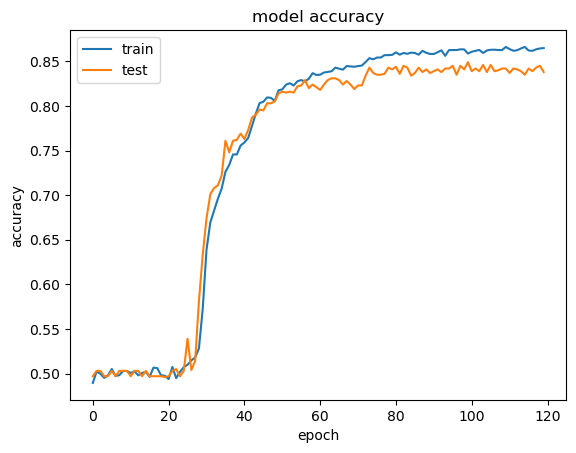

In [415]:
%matplotlib inline
print(im_history.history.keys())
# summarize history for accuracy
plt.plot(im_history.history['accuracy'])
plt.plot(im_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()